In [42]:
## Install required packages
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.

In [49]:
def get_sequences_from_file(fasta_fn):
    """Description: Creates a dictionary to get sequences from fasta file.
    
    Arguments: 
       fasta_fn  :  fasta file with sequence information
    
    Return: dictionary
    
        
    """
    sequence_data_dict = {}  #creates empty dictionary where sequence data will be stored
    for record in SeqIO.parse(fasta_fn, "fasta"):  #reads data, parses each record in file
        description = record.description.split()   #splits description into a list of words
        species_name = description[1] + " " + description[2]   #creates species name from second and third word in list
        sequence_data_dict[species_name] = record.seq  #adds species name to dictionary aligned with sequence data
    return(sequence_data_dict)   #returns dictionary  #returns dictionary

In [50]:
#make sure it works
get_sequences_from_file("penguins_cytb.fasta")

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

## 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [51]:
from Bio.Data import CodonTable
#define function
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    #create sequence string
    aa_seq_string = ""
    #loop to go through length of string, every set of 3
    for myI in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[myI:myI+3]
        #break if a stop codon is identified
        if codon in mito_table.stop_codons:
            break
        #aa is amino acid
        aa = mito_table.forward_table[codon]
        #add amino acid to string
        aa_seq_string += aa
       #return string
    return(aa_seq_string)

In [52]:
#example to make sure working correctly
string_nucleotides = "ATGGCCATGGCGCCCACTGTCAATAGTACCCGTATTAACGGGTGA"
translated_nucleotides = translate_function(string_nucleotides)
print(translated_nucleotides)

MAMAPTVNSTRINGW


## 3. Write an alternative translation function.

In [53]:
###use from biopython workbook, base off this example code
from Bio.Seq import Seq
#define function, taking in dna sequence as argument
def alternative_translation(dna_sequence):
    #use Seq to set as sequence
    my_seq = Seq(dna_sequence)
    #translate sequence
    translated_seq = my_seq.translate()
    #return
    return translated_seq

In [54]:
#check alternative translation function
dna_sequence = "ATGGCCATGGCGCCCACTGTCAATAGTACCCGTATTAACGGGTGA"
alternative_translation(dna_sequence)

Seq('MAMAPTVNSTRING*')

## 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.

using information from: http://biopython.org/wiki/ProtParam

In [55]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    #create object from aa sequence
    protein = ProteinAnalysis(str(aa_seq))
    #calculate weight
    molecular_weight = protein.molecular_weight()
    #return the calculated weight
    return molecular_weight

In [56]:
#check to make sure it works
aa_seq = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"
molecular_weight = compute_molecular_weight(aa_seq)
print ("Molecular weight: ", molecular_weight)

Molecular weight:  17103.1617


## 5. Write a function that computes the GC-content of each DNA sequence.

In [57]:
def gc_content(dna):
    """Description: Computes GC for a given DNA string
    
    Arguments: 
       dna  :  DNA string
    
    Return: a float value 
    
    Example of usage:
       >>> gc = gc_content(dna = "AATCGACAATAGCCCATTGATACAT")
       >>> print(gc)
       
       Output:
          0.56
    
    """
    #calculate count of G and C in sequence and divide by total length - asks for proportion not percentage
    gc_pc = ((dna.count('G') + dna.count('C') )/len(dna))
    #return calculated proportion
    return(gc_pc)

In [58]:
#check to make sure this works
dna = "AATCGACAATAGCCCATTGATACAT"
print ("GC Proportion: ", gc_content(dna))

GC Proportion:  0.36


In [59]:
import pandas as pd

In [60]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

## 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.

In [61]:
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.
penguins_df['Molecular weight'] = "NaN"
penguins_df['GC Content'] = "NaN"
penguins_df

,species,mass,Molecular weight,GC Content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.

In [62]:
#create lists to be appended to with data
translateda = []
molecular_weighta = []
gc_contenta = []

for species in species_list:
    #get dna sequence from file
    dna_seq = cytb_seqs.get(species)
    #translate the sequence
    translated=translate_function(dna_seq)
    #call function to compute molecular weight
    molecular_weight = compute_molecular_weight(translated)
    molecular_weighta.append(molecular_weight)
    #call gc_content function
    gc = gc_content(dna_seq)
    gc_contenta.append(gc)
          
penguins_df['Molecular weight'] = molecular_weighta
penguins_df['GC Content'] = gc_contenta   


In [63]:
#check to make sure it works
penguins_df

,species,mass,Molecular weight,GC Content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311
5,Eudyptula minor,1.60,42491.6408,0.492563
6,Pygoscelis adeliae,4.60,42458.6140,0.490814
7,Pygoscelis antarctica,4.10,42404.5423,0.477690
8,Pygoscelis papua,6.10,42595.8759,0.471566
9,Spheniscus demersus,3.20,42431.5490,0.482940


## 8. Plot a bar-chart of adult body mass per species.

## *Q1* What is the smallest penguin species? 
Eudyptula minor
## *Q2* What is the geographical range of this species?
found throughout the southern coast of Austrailia


Text(0.5, 1.0, 'Mass by Species')

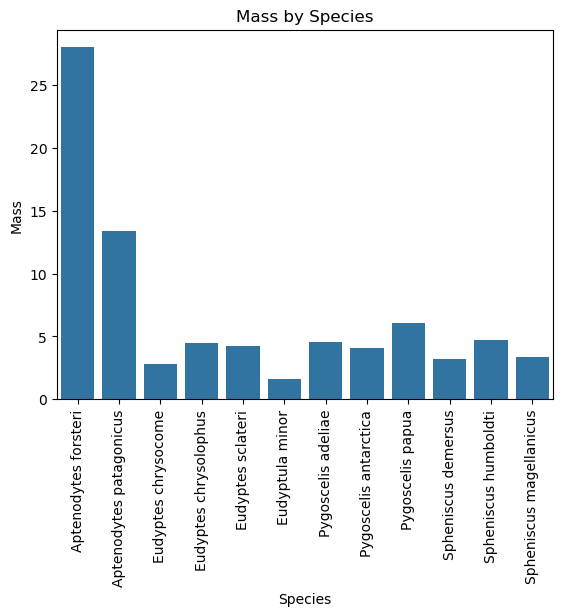

In [64]:

# creating the bar plot
#import packages needed 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.barplot(data=penguins_df, x='species', y='mass')
#turn labels so readable
plt.xticks(rotation=90)
#label plot
plt.xlabel("Species")
plt.ylabel("Mass")
plt.title("Mass by Species")

## 9. Plot a graph that shows the molecular weight as a function of GC content. 

Text(0.5, 1.0, 'Molecular weight as a function of GC-Content')

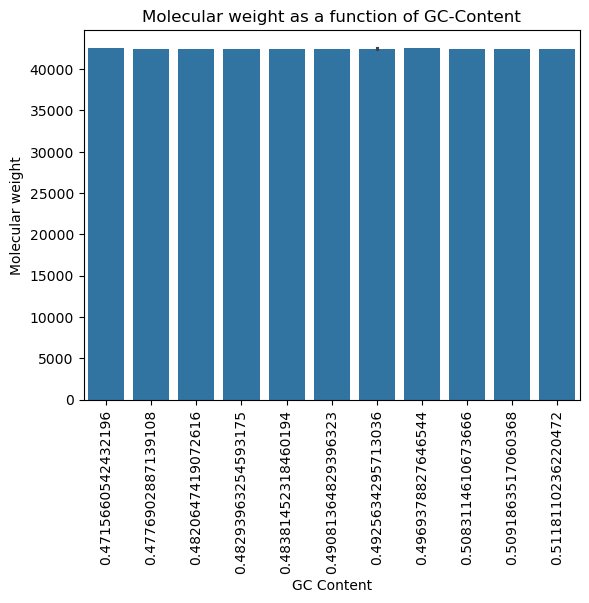

In [65]:
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).
sns.barplot(data=penguins_df, x='GC Content', y='Molecular weight')
plt.xticks(rotation=90)
#label plot
plt.xlabel("GC Content")
plt.ylabel("Molecular weight")
plt.title("Molecular weight as a function of GC-Content")

## 10. Write the entire DataFrame to a new CSV file that includes your new columns.

In [66]:
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"
penguins_df.to_csv('penguines_mass_cytb.csv', index=False)

## 11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

In [67]:
#calculate average mass
average_mass = penguins_df['mass'].mean()
print(f"The average mass is: {average_mass:.2f}")

The average mass is: 6.73


In [68]:
#add column that contains data on each species' distance from the average mass, calculated above
#create column
penguins_df['Dist from mean mass'] = "NaN"
#make sure it worked
penguins_df
#create empty list for distance from mean data to go
dist_meana = []
#for every mass, show absolute value difference
for mass in penguins_df:
    dist_meana = (abs(penguins_df['mass']) - average_mass)
#put data in column          
penguins_df['Dist from mean mass'] = dist_meana
 

Text(0.5, 1.0, 'Distance from mean mass by species')

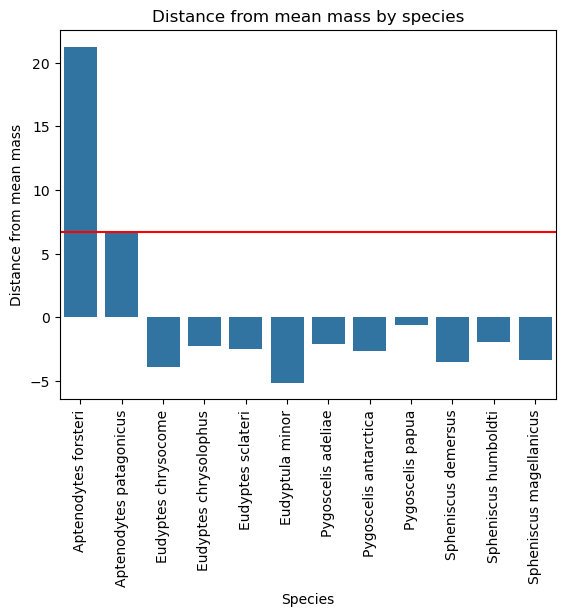

In [69]:
sns.barplot(data=penguins_df, x='species', y='Dist from mean mass')
#turn labels so readable
plt.xticks(rotation=90)
#add horizontal red line at the average mass
plt.axhline(y=6.73, color ='r', linestyle ='-')
#label plot
plt.xlabel("Species")
plt.ylabel("Distance from mean mass")
plt.title("Distance from mean mass by species")